In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
print(boston.data.shape)


(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston=pd.DataFrame(boston.data)

In [6]:
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


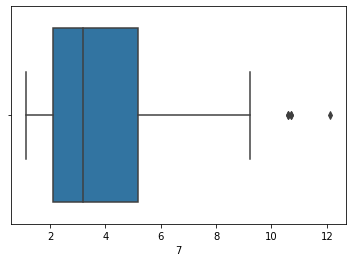

In [7]:
sns.boxplot(boston[7])
plt.show()

In [8]:
'''majority of datapoints in this section 
values are not outlier which are enclosed in this boundary lower whisker and
upper whisker boundaries and majority of datapoints in this section(fill) and 
outside the boundaries points are outlier there are 3 points to find outliers
between 10 and 12'''

'majority of datapoints in this section \nvalues are not outlier which are enclosed in this boundary lower whisker and\nupper whisker boundaries and majority of datapoints in this section(fill) and \noutside the boundaries points are outlier there are 3 points to find outliers\nbetween 10 and 12'

In [9]:
boston_c=boston

In [10]:
from scipy import stats

In [11]:
zscore=np.abs(stats.zscore(boston_c))

In [12]:
print(zscore)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [13]:
'''this values show very difficult to find which points are outlier
so lets defined thershold to identify the outlier'''

'this values show very difficult to find which points are outlier\nso lets defined thershold to identify the outlier'

In [14]:
threshold=3
print(np.where(zscore>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [15]:
'''first of array represent the rows numbers and next array are
the column address'''

'first of array represent the rows numbers and next array are\nthe column address'

In [16]:
print(zscore[102][11])  #this is the outlier value

3.134425327914092


In [17]:
#Another method(mathmatical method to find outlier)
boston_iqr=boston

In [18]:
Q1=boston_iqr.quantile(.25)
Q3=boston_iqr.quantile(.75)
IQR=Q3-Q1
print(IQR)


0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64


In [19]:
print((boston_iqr<(Q1-1.5*IQR)) |(boston_iqr>(Q3+1.5*IQR)))

        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

In [20]:
#outlier find 18th row and 11th column


In [21]:
#Remove outlier

In [22]:
boston_clean=boston #copt dataset

In [23]:
boston_clean=boston_clean[(zscore<3).all(axis=1)]# all the rows 
#filter out the outliers

In [24]:
boston.shape

(506, 13)

In [25]:
boston_clean.shape

(415, 13)

In [34]:
#Remove Outlier IQR
boston_iqr_clean=boston_iqr[~((boston_iqr<(Q1-1.5*IQR)) |(boston_iqr>(Q3+1.5*IQR))).any(axis=1)]

In [35]:
boston_iqr_clean.shape

(274, 13)

In [36]:
boston_iqr.shape

(506, 13)